## Overview of The Dataset

- **Problem:** Understand the structure of the dataset, identify missing values, and check data types for each column.
- **Approach:** Load the dataset, inspect its shape and data types, check for missing values, and replace any non-numeric entries in the `streams` column.
- **Functions to be Used:**
  - `pd.read_excel()` – loads the dataset from an Excel file.
  - `.shape` – returns the number of rows and columns.
  - `.dtypes` – shows data types for each column.
  - `.isnull().sum()` – counts missing values in each column.
  - `.loc[]` – accesses specific rows/columns to modify data.
- **Expected Output:** The shape of the dataset, data types for each column, count of missing values, and confirmation that the specified `streams` value is set to NaN.

In [292]:
# Load the needed libraries for the Exploratory Dataset Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset by using the function "pd.read_excel"
Spotify_Data = pd.read_excel('spotify-2023.xlsx') 

# Display the first and last few rows to understand the structure of the dataset
Spotify_Data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [294]:
# Data Cleaning: Replace non-numeric 'streams' value for "Love Grows (Where My Rosemary Goes)" with NaN
Spotify_Data.loc[Spotify_Data['track_name'] == 'Love Grows (Where My Rosemary Goes)', 'streams'] = np.nan

# Display the modified data to check if the 'streams' value has been set to NaN for the specified track
print("\nModified Data for 'Love Grows (Where My Rosemary Goes)':\n")
Spotify_Data[Spotify_Data['track_name'] == 'Love Grows (Where My Rosemary Goes)']


Modified Data for 'Love Grows (Where My Rosemary Goes)':



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


**Insight: Handling NaN Value in Streams Column for "Love Grows (Where My Rosemary Goes)"**

*The track "Love Grows (Where My Rosemary Goes)" contains a non-numeric entry in the `streams` column, which prevents calculations like mean, median, and standard deviation. This non-numeric value has been replaced with `NaN` in the `streams` column only, while other columns (such as `bpm`, `key`, and `mode`) remain unchanged. This adjustment ensures that statistical calculations for streams use only valid numerical data.*

#### *Part A*: How many rows and columns does the dataset contain? 

In [296]:
# Overview of the dataset
print("Shape of the dataset:", Spotify_Data.shape)

Shape of the dataset: (953, 24)


#### *Part B*: What are the data types of each column? 

In [298]:
# Data types of each column
print("\nData types:") 
print(Spotify_Data.dtypes)


Data types:
track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object


#### *Part C*: Are there any missing values?

In [300]:
# Checking for missing values after replacing specific entries with NaN in the 'streams' column only
print("\nMissing values:")
print(Spotify_Data.isnull().sum())


Missing values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


**Dataset Overview**

- **Rows and Columns**: *The dataset has `{Spotify_Data.shape[0]}` rows and `{Spotify_Data.shape[1]}` columns.*
- **Data Types**: *Each column’s data type is displayed, with numerical types for musical metrics and categorical types for track and artist details.*
- **Missing Values**: *Only the `streams` column for "Love Grows (Where My Rosemary Goes)" is treated as `NaN`. This ensures the accuracy of our analysis for streams without affecting calculations involving other columns.*

## Basic Descriptive Statistics

- **Problem:** Calculate and display key descriptive statistics for the dataset, focusing on the `streams` column (mean, median, and standard deviation).
- **Approach:** Use summary statistics methods to get an overview of numerical columns and calculate specific metrics for `streams`.
    - `{mean_streams}` – This represents the average number of streams across all tracks.
    - `{median_streams}` – The median provides the midpoint of the streams data, less affected by outliers than the mean.
    - `{std_streams}` – This measures the spread of stream counts, showing variability in track popularity.
- **Functions to be Used:**
  - `.describe().transpose()` – displays summary statistics for numerical columns.
  - `.mean()`, `.median()`, `.std()` – calculates mean, median, and standard deviation of `streams`.
- **Expected Output:** Summary statistics for all numerical columns, and the mean, median, and standard deviation for the `streams` column.


*Note: Only the `streams` column for "Love Grows (Where My Rosemary Goes)" is treated as `NaN`, ensuring other columns retain their original values.*

In [302]:
# Summary statistics of numerical columns
print("Summary Statistics for Numerical Columns:\n")
print(Spotify_Data.describe().transpose())
print(f"{'-'*30}")
# Mean, median, and standard deviation of 'streams'
mean_streams = Spotify_Data['streams'].mean()
median_streams = Spotify_Data['streams'].median()
std_streams = Spotify_Data['streams'].std()

# Display detailed statistics for 'streams'
print("\nDetailed Statistics for 'Streams' Column:")
print("Mean streams:", mean_streams)
print("Median streams:", median_streams)
print("Standard deviation of streams:", std_streams)

Summary Statistics for Numerical Columns:

                      count         mean          std     min     25%     50%  \
artist_count          953.0     1.556139     0.893044     1.0     1.0     1.0   
released_year         953.0  2018.238195    11.116218  1930.0  2020.0  2022.0   
released_month        953.0     6.033578     3.566435     1.0     3.0     6.0   
released_day          953.0    13.930745     9.201949     1.0     6.0    13.0   
in_spotify_playlists  953.0  5200.124869  7897.608990    31.0   875.0  2224.0   
in_spotify_charts     953.0    12.009444    19.575992     0.0     0.0     3.0   
in_apple_playlists    953.0    67.812172    86.441493     0.0    13.0    34.0   
in_apple_charts       953.0    51.908709    50.630241     0.0     7.0    38.0   
in_deezer_playlists   953.0   385.187828  1130.535561     0.0    13.0    44.0   
in_deezer_charts      953.0     2.666317     6.035599     0.0     0.0     0.0   
in_shazam_charts      903.0    59.995570   161.161093     0.0     

## Visualize Released Year and Artist Count Distributions

- **Problem:** Show the distribution of `released_year` and `artist_count` to identify any trends or outliers.
- **Approach:** Use histograms with kernel density estimates (KDE) to visualize the distribution of the release year and artist count.
- **Functions to be Used:**
  - `sns.histplot()` – creates a histogram plot with an optional KDE line.
- **Expected Output:** Two histograms showing the distribution of the `released_year` and `artist_count`, helping to identify trends and potential outliers.

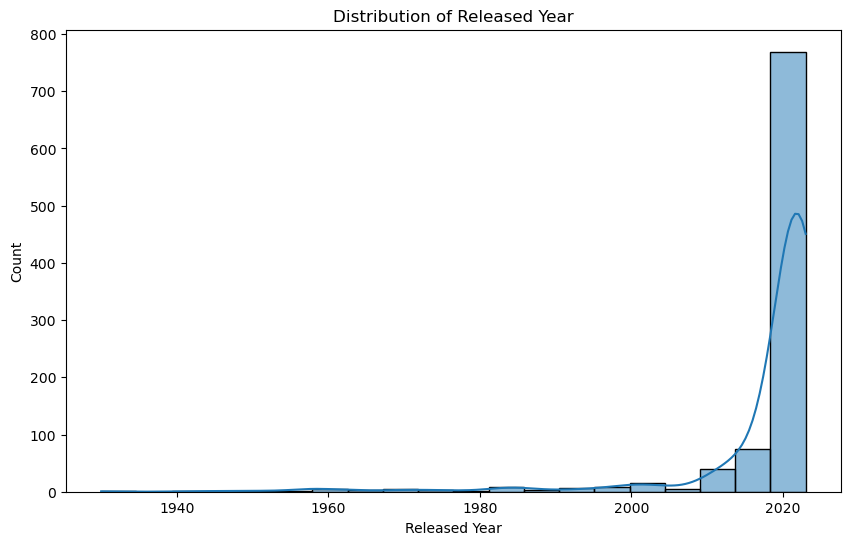

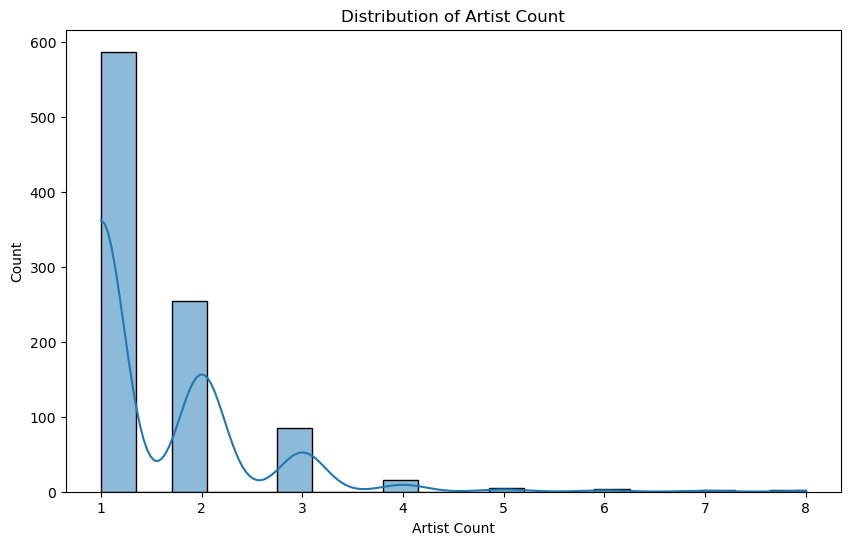

In [304]:
# Distribution of released_year
plt.figure(figsize=(10, 6))
sns.histplot(Spotify_Data['released_year'], bins=20, kde=True)
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.show()

# Distribution of artist_count
plt.figure(figsize=(10, 6))
sns.histplot(Spotify_Data['artist_count'], bins=20, kde=True)
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Count')
plt.show()

**Distribution Analysis**

- **Released Year**: *The distribution shows the concentration of popular tracks over time, highlighting potential trends or surges in certain years.*
- **Artist Count**: *This visualization reveals how frequently single or multiple artists collaborate on top-streamed tracks. Peaks in artist count might indicate collaboration trends in popular music.*

## Visualizations for Top Tracks and Artists

- **Problem:** Identify the tracks and artists with the highest popularity based on the number of streams and track count.
- **Approach:** Find the top 5 most-streamed tracks by sorting the `streams` column, and identify the top 5 most frequent artists by counting the occurrences in the `artist(s)_name` column.
- **Functions to be Used:**
  - `dropna()` – removes NaN values.
  - `sort_values()` – sorts the data to find top values.
  - `value_counts()` – counts occurrences for categorical data.
  - `sns.barplot()` – visualizes the top values as a bar chart.
- **Expected Output:** A list of the top 5 most-streamed tracks with a bar chart visualization and a list of the top 5 most frequent artists with a bar chart.

#### *Part A*: Which track has the highest number of streams? Display the top 5 most streamed tracks.

The Top 5 Most Streamed Tracks in Spotify:

                                        track_name     streams
55                                 Blinding Lights  3703895074
179                                   Shape of You  3562543890
86                               Someone You Loved  2887241814
620                                   Dance Monkey  2864791672
41   Sunflower - Spider-Man: Into the Spider-Verse  2808096550 



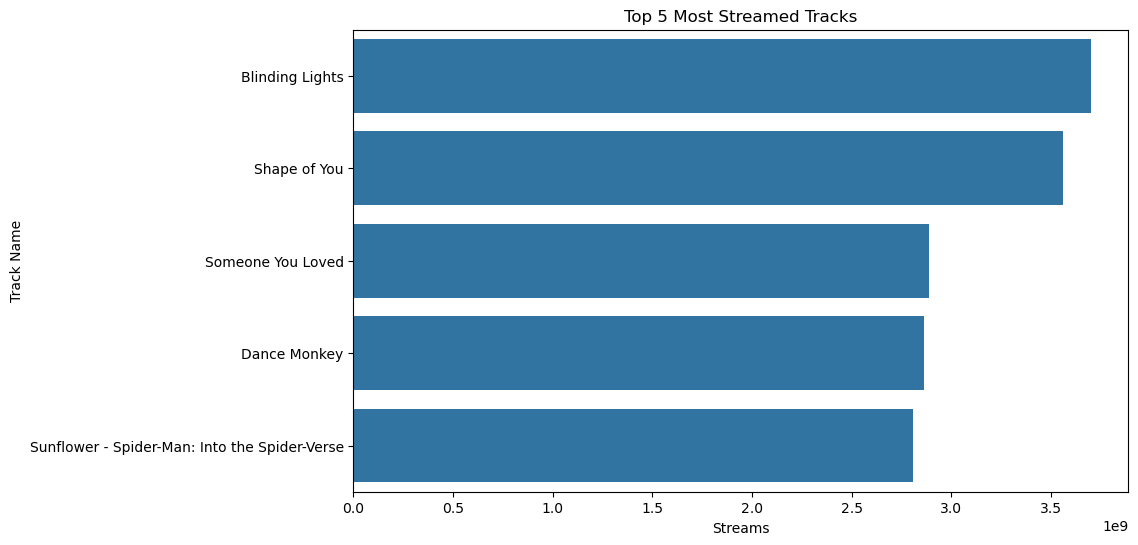

In [306]:
# Top 5 most streamed tracks (ignoring NaN values in 'streams')
most_streamed = Spotify_Data[['track_name', 'streams']].dropna().sort_values(by='streams', ascending=False).head(5)
print("The Top 5 Most Streamed Tracks in Spotify:\n")
print(most_streamed, "\n")

# Plotting the top 5 tracks by streams
plt.figure(figsize=(10, 6))
sns.barplot(x='streams', y='track_name', data=most_streamed)
plt.title('Top 5 Most Streamed Tracks')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.show()

**Top 5 Most Streamed Tracks**

*The bar chart displays the top 5 tracks based on stream count. These tracks dominate in terms of popularity, potentially due to factors like genre, artist, or release timing. Since "Love Grows (Where My Rosemary Goes)" has a missing value for `streams`, it is automatically excluded from this ranking.*

#### *Part B*: Who are the top 5 most frequent artists based on the number of tracks in the dataset?

The Top 5 Most Frequent Artists Based on Track Count:

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64 



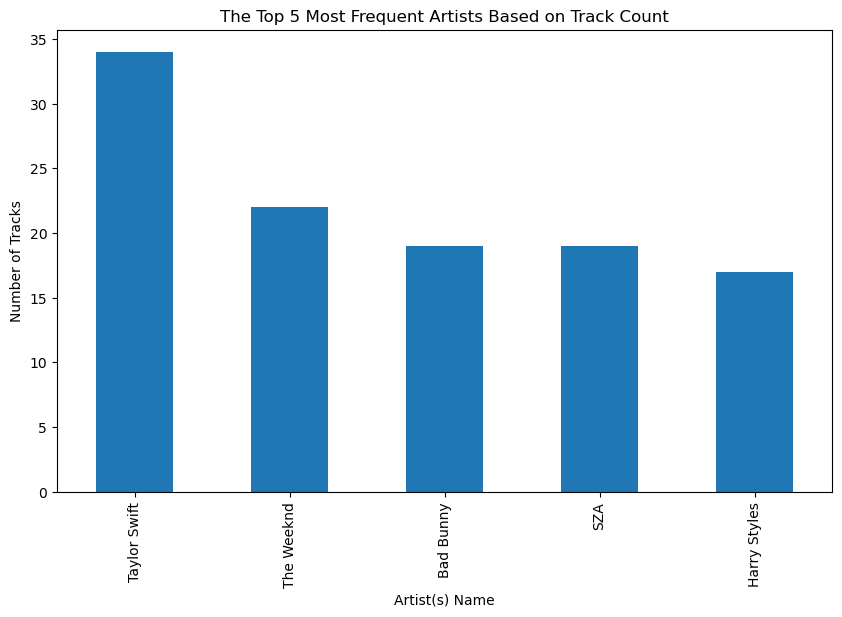

In [308]:
# Top 5 most frequent artists
frequent_artists = Spotify_Data['artist(s)_name'].value_counts().head(5)
print("The Top 5 Most Frequent Artists Based on Track Count:\n")
print(frequent_artists, "\n")

# Bar plot for top 5 artists by track count
plt.figure(figsize=(10, 6))
frequent_artists.plot(kind='bar')
plt.title('The Top 5 Most Frequent Artists Based on Track Count')
plt.xlabel('Artist(s) Name')
plt.ylabel('Number of Tracks')
plt.show()

**Top 5 Artists by Track Count**

*This visualization highlights the artists with the most appearances in the dataset. Frequent appearances suggest these artists consistently release music that resonates with listeners.*

## Temporal Trends

- **Problem:** Analyze trends in the release dates of tracks over time to observe yearly and monthly patterns.
- **Approach:** Count the number of tracks released per year and per month, and use line and bar plots to visualize the trends.
- **Functions to be Used:**
  - `value_counts()` – counts occurrences of each unique value.
  - `sort_index()` – sorts values based on the index.
  - `plt.plot() and plt.bar()` – plots line and bar charts.
- **Expected Output:** Line plot showing the number of tracks released each year and a bar plot showing monthly release trends with labels for the peak release year and month.

#### *Part A*: Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

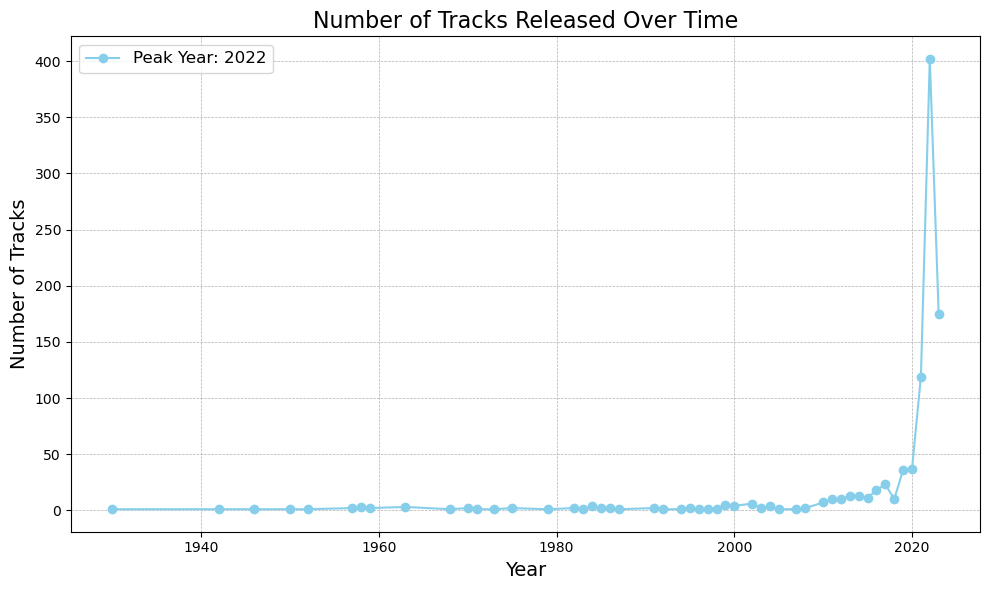

In [310]:
# Count of tracks released per year
release_year_counts = Spotify_Data['released_year'].value_counts().sort_index()

# Plotting tracks released per year with enhancements
plt.figure(figsize=(10, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', color='skyblue', label=f'Peak Year: {release_year_counts.idxmax()}')

plt.title('Number of Tracks Released Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

**Temporal Trends in Track Releases**

*The line chart shows how the number of releases has evolved over time. Notable increases in certain years may reflect industry trends or shifts in music production.*

#### *Part B*: Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

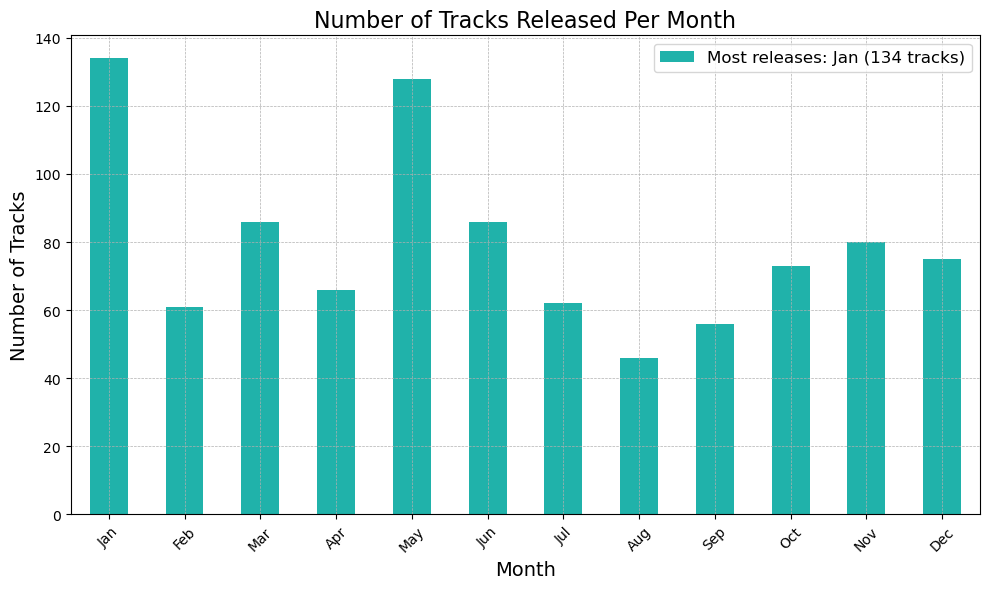


Month with the most releases: Jan
Number of tracks released in that month: 134


In [312]:
# Count the number of tracks released per month
monthly_release_counts = Spotify_Data['released_month'].value_counts().sort_index()

# Plotting the number of tracks released per month
plt.figure(figsize=(10, 6))
monthly_release_counts.plot(kind='bar', color='lightseagreen')
plt.title('Number of Tracks Released Per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Display the month with the highest releases
peak_month = monthly_release_counts.idxmax()
peak_month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][peak_month - 1]
peak_month_count = monthly_release_counts.max()

# Show the legend with the month name and the number of releases
plt.legend([f'Most releases: {peak_month_name} ({peak_month_count} tracks)'], fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nMonth with the most releases: {peak_month_name}")
print(f"Number of tracks released in that month: {peak_month_count}")

# Genre and Music Characteristics

### Correlation Between Streams and Musical Attributes

- **Problem:** Determine how musical attributes (like bpm, danceability, and energy) correlate with the number of streams.
- **Approach:** We will use correlation analysis with `pandas` and `seaborn` to calculate and visualize the relationship between `streams` and each musical attribute (bpm, danceability, energy).
- **Functions to be Used:** 
  - `pandas.corr()` – calculates the correlation between attributes.
  - `seaborn.heatmap()` – visualizes the correlation matrix.
  - `seaborn.regplot()` – visualizes the relationships between streams and each attribute individually.
- **Expected Output:** A correlation matrix that shows which attributes correlate most with streams, along with scatter plots to illustrate these relationships.

#### *Part A:* Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

Correlation matrix:

                 streams       bpm  danceability_%  energy_%
streams         1.000000 -0.002438       -0.105457 -0.026051
bpm            -0.002438  1.000000       -0.147095  0.025794
danceability_% -0.105457 -0.147095        1.000000  0.198095
energy_%       -0.026051  0.025794        0.198095  1.000000 



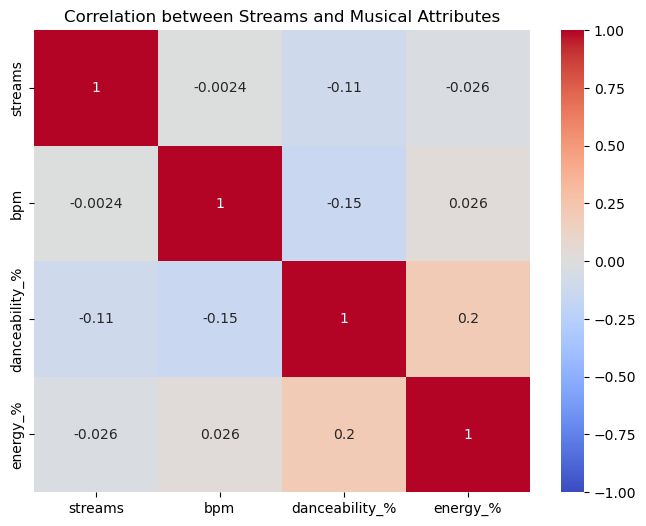

In [314]:
# Correlation matrix of selected musical attributes with streams
correlation_matrix = Spotify_Data[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
print("Correlation matrix:\n")
print(correlation_matrix, "\n")

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Streams and Musical Attributes')
plt.show()

**Correlation Analysis**

*The heatmap shows the relationship between streams and other musical attributes. A strong positive or negative correlation indicates an attribute's influence on a track's popularity.*

### Correlation Between Danceability, Energy, Valence, and Acousticness

- **Problem:** Determine the correlation between danceability_% and energy_%, and between valence_% and acousticness_%, and visualize them using scatter plots side by side.
- **Approach:** We will calculate the correlation between danceability_% and energy_%, and between valence_% and acousticness_%, followed by side-by-side scatter plots with regression lines to visualize these relationships. The regression lines will help identify any linear correlations between the variables.
- **Functions to be Used:**
  - `corr()` – calculates the correlation between two variables.
  - `sns.regplot()` – plots the scatter plot with an optional regression line to visualize the correlation between two continuous variables.
  - `scatter_kws` – customizes the appearance of scatter points, such as size, color, and transparency.
  - `line_kws` – customizes the appearance of the regression line.
  - `plt.subplots()` – creates a grid of subplots to display multiple plots in one figure.
  - `plt.grid()` – adds gridlines to make the plot clearer.
  - `plt.tight_layout()` – adjusts the layout to ensure elements fit well within the plot area.
- **Expected Output:** 
  - The calculated correlation values between danceability_% and energy_%, and between valence_% and acousticness_%.
  - Two scatter plots displayed side by side:
    - **Left plot:** Danceability vs Energy.
    - **Right plot:** Valence vs Acousticness. The regression lines will help highlight any trends or correlations.

#### *Part B:* Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


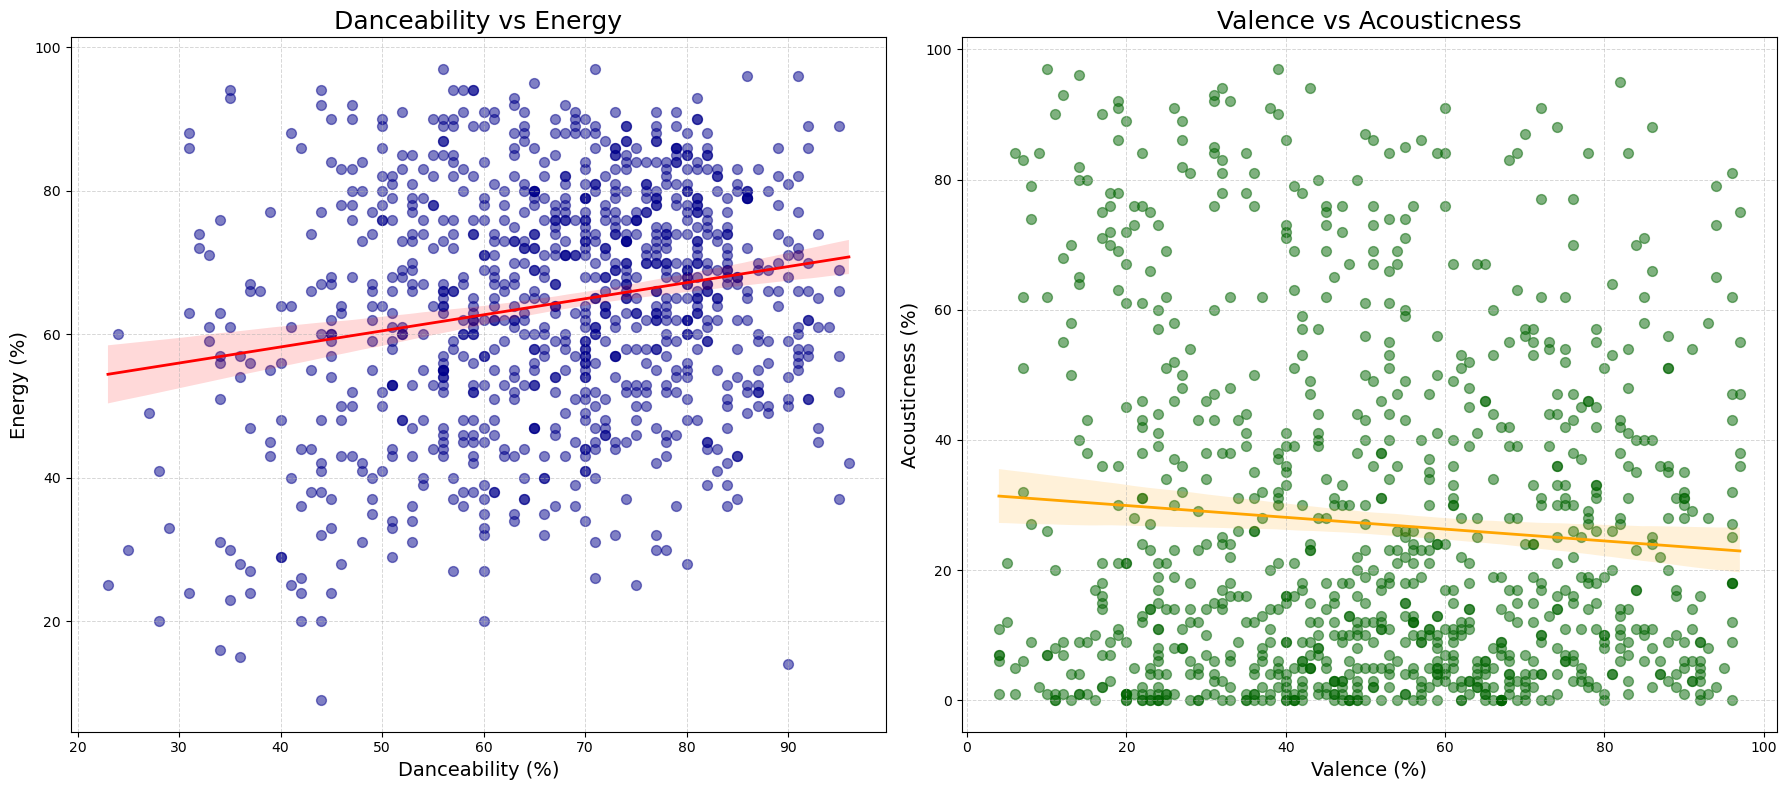

In [316]:
# Correlation between danceability and energy
dance_energy_corr = Spotify_Data['danceability_%'].corr(Spotify_Data['energy_%'])
print(f"Correlation between Danceability and Energy: {dance_energy_corr:.2f}")

# Correlation between valence and acousticness
valence_acoustic_corr = Spotify_Data['valence_%'].corr(Spotify_Data['acousticness_%'])
print(f"Correlation between Valence and Acousticness: {valence_acoustic_corr:.2f}")

# Create a side-by-side subplot for both scatter plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Scatter plot for Danceability vs Energy
sns.regplot(x='danceability_%', y='energy_%', data=Spotify_Data, 
            scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'darkblue'}, 
            line_kws={'color': 'red', 'linewidth': 2}, ax=axes[0])
axes[0].set_title('Danceability vs Energy', fontsize=18)
axes[0].set_xlabel('Danceability (%)', fontsize=14)
axes[0].set_ylabel('Energy (%)', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Scatter plot for Valence vs Acousticness
sns.regplot(x='valence_%', y='acousticness_%', data=Spotify_Data, 
            scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'darkgreen'}, 
            line_kws={'color': 'orange', 'linewidth': 2}, ax=axes[1])
axes[1].set_title('Valence vs Acousticness', fontsize=18)
axes[1].set_xlabel('Valence (%)', fontsize=14)
axes[1].set_ylabel('Acousticness (%)', fontsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Adjust layout to make the plots fit nicely
plt.tight_layout()
plt.show()

# Platform Popularity

### Track Count Analysis in Playlists Across Platforms

- **Problem:** 
  - Determine the number of tracks listed on each platform's playlist (Spotify, Deezer, and Apple).
  - Calculate the mean streams of tracks listed on each platform to identify which platform favors more popular tracks.
- **Approach:** 
  - Compute the total number of tracks listed in playlists for each platform (Spotify, Deezer, and Apple).
  - Calculate the average streams for each platform by grouping the data based on tracks listed on each platform's playlists.
  - Visualize the results using bar charts: one to show the track counts for each platform, and another to check which platform favors more popular tracks based on the average streams.
- **Functions to be Used:**
  - `sum()` – Calculates the total number of tracks for each platform by summing the '1's in the platform's playlist columns.
  - `groupby()` – Groups the data based on the presence of tracks in playlists across platforms, allowing for aggregation of streams.
  - `mean()` – Computes the average number of streams per track for each platform.
  - `plt.bar()` – Generates a bar chart to display the number of tracks listed on each platform's playlist.
  - `plt.text()` – Adds labels on top of the bars to display the exact values for each bar.
  - `plt.title()` – Sets the title of the plot.
  - `plt.xlabel()` & `plt.ylabel()` – Set the labels for the x-axis and y-axis.
  - `plt.grid()` – Adds gridlines to the plot for better readability.
  - `plt.figure()` – Creates a figure for the plot and defines the size of the chart.
  - `plt.tight_layout()` – Adjusts the layout to ensure the elements fit neatly within the plot area.
  - `plt.show()` – Displays the plot.
- **Expected Output:**
  - The total number of tracks listed on each platform's playlist, printed in the console.
  - The mean streams per platform, printed in the console to identify which platform hosts the most popular tracks.
  - A bar chart displaying the number of tracks on Spotify, Deezer, and Apple playlists.
  - The exact values of track counts on top of the bars in the chart for easy interpretation.
  - A well-labeled plot with gridlines for clear visualization.

#### How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?

Number of Tracks in Each Platform's Playlist:
{'Spotify': 4955719, 'Deezer': 367084, 'Apple': 64625} 


Mean Streams Per Platform:
 in_spotify_playlists  in_deezer_playlists  in_apple_playlists
31                    8                    2                       38411956.0
34                    0                    0                       68216992.0
58                    4                    2                       39058561.0
67                    0                    7                       47956378.0
77                    4                    8                       29562220.0
                                                                     ...     
44927                 5108                 34                    1479115056.0
49991                 12367                265                   1690192927.0
50887                 6284                 315                   1970673297.0
51979                 5063                 306                   1806617704.0
52898                 8215

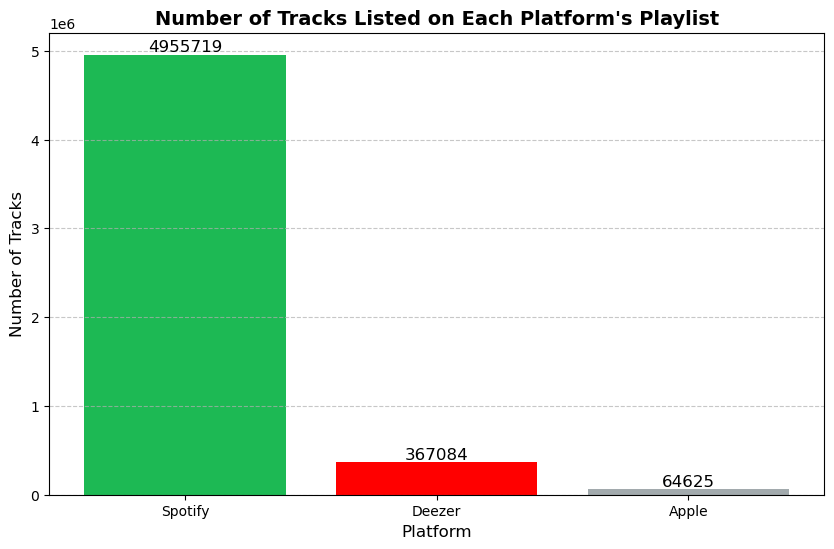

In [397]:
# Count the number of tracks appearing on each platform's playlist
platform_counts = {
    'Spotify': Spotify_Data['in_spotify_playlists'].sum(),
    'Deezer': Spotify_Data['in_deezer_playlists'].sum(),
    'Apple': Spotify_Data['in_apple_playlists'].sum()
}

# Display the counts
print("Number of Tracks in Each Platform's Playlist:")
print(platform_counts, "\n")

# To check which platform favors the most popular tracks, we can calculate the mean streams for each platform
mean_streams_per_platform = Spotify_Data.groupby(['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists'])['streams'].mean()

# Display the mean streams per platform
print("\nMean Streams Per Platform:\n", mean_streams_per_platform, "\n")

# Plot a bar chart to visualize the track counts for each platform
plt.figure(figsize=(10, 6))
bars = plt.bar(platform_counts.keys(), platform_counts.values(), color=['#1DB954', '#FF0000', '#A2AAAD'])

# Adding grid, title, and labels
plt.title("Number of Tracks Listed on Each Platform's Playlist", fontsize=14, fontweight='bold')
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)

# Add exact values on top of each bar for better readability
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom', fontsize=12)

# Display grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Additional Comparison of Track Numbers and Popularity Across Platforms

- **Problem:** Compare the number of tracks in `spotify_playlists`, `spotify_charts`, and `apple_playlists`, and check which platform favors the most popular tracks.
- **Approach:**
  - Reshape the data using `melt()` to focus on tracks in the playlists of each platform.
  - Use a boxplot to show the distribution of streams across platforms, revealing which platform has higher or lower average streams for the tracks.
- **Functions to be Used:**
  - `melt()` – reshapes the data to a long format.
  - `sns.boxplot()` – creates a boxplot to visualize stream distribution.
  - `plt.figure()` – sets the plot size.
  - `plt.title()`, `plt.xlabel()`, `plt.ylabel()` – adds titles and labels.
  - `plt.grid()` – adds gridlines for clarity.
  - `plt.tight_layout()` – adjusts the plot layout.
- **Expected Output:** 
  - A boxplot showing the distribution of streams for tracks on `spotify_playlists`, `deezer_playlists`, and `apple_playlists`, helping to identify which platform favors more popular tracks.

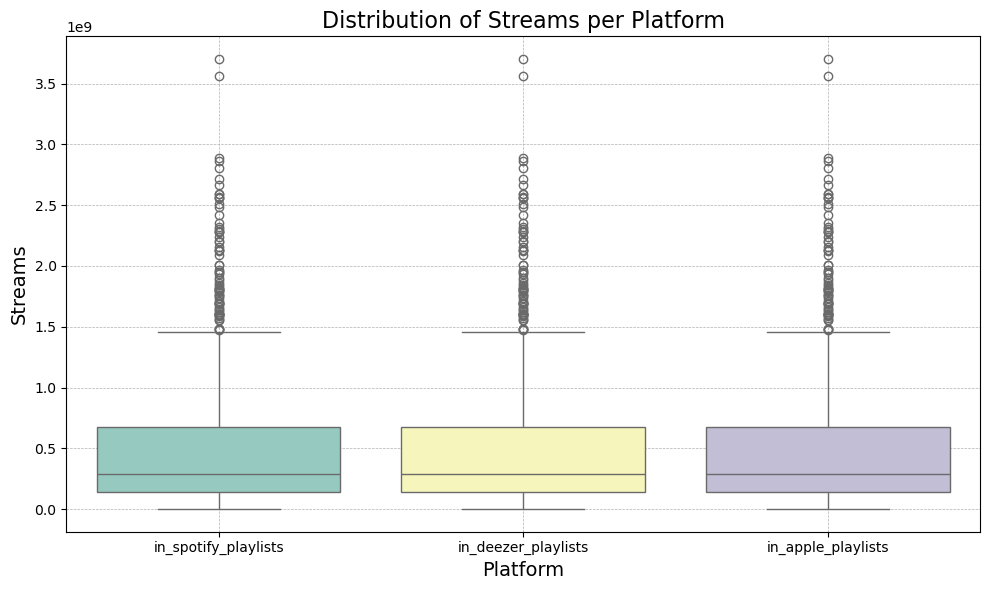

In [410]:
# Melt the DataFrame to long-form
melted_data = Spotify_Data.melt(id_vars=['streams'], 
                                value_vars=['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists'], 
                                var_name='Platform', value_name='In_Playlist')

# Plotting the boxplot with hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='streams', data=melted_data, hue='Platform', palette='Set3')
plt.title('Distribution of Streams per Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Advanced Analysis: Key, Mode, Genre, and Artists in Playlists

### Advanced Analysis: Patterns by Key and Mode

- **Problem:** Analyze how tracks in different musical keys and modes (Major vs. Minor) perform in terms of both average streams and track counts across the dataset. This analysis will help in understanding if certain keys or modes tend to have more tracks or higher popularity.
- **Approach:**
  - The dataset is grouped by both 'key' and 'mode' (Major vs. Minor), calculating two metrics:
    - The **average streams** for each combination of key and mode.
    - The **track count** for each key and mode group, which represents how many tracks fall under each category.
  - Two subplots are created to visualize the relationships:
    1. A **bar plot for average streams** by key and mode.
    2. A **bar plot for track counts** by key and mode.
  - The first plot uses the 'viridis' color palette, while the second uses the 'coolwarm' palette to distinguish between the two metrics visually.
- **Functions to be Used:**
  - `agg()` – aggregates data to calculate both average streams and track count.
  - `plt.subplot()` – creates a side-by-side layout for two bar plots.
  - `plt.tight_layout()` – adjusts the layout to prevent overlapping of elements.
  - `groupby()` – groups the data by multiple columns (`key` and `mode`) and calculates the mean streams for each group.
  - `reset_index()` – resets the index of the grouped data to turn the group labels into columns.
  - `sns.barplot()` – plots the average streams for each `key` with bars colored by `mode` (Major vs Minor).
  - `palette='viridis'` – applies the 'viridis' color palette to differentiate between modes visually.
  - `plt.title()`, `plt.xlabel()`, `plt.ylabel()` – set the title and axis labels of the plot for clarity.
- **Expected Output:**
  - Two bar plots:
    - The **first plot** will show average streams by key and mode.
    - The **second plot** will display the number of tracks for each key and mode.
  - This will help identify patterns in the popularity and frequency of tracks in various keys and modes, allowing comparisons between Major and Minor modes across different keys.

Patterns based on key and mode:
   key   mode           streams  track_count
0    A  Major  401960332.585366           42
1    A  Minor  417390630.969697           33
2   A#  Major  627533592.148148           27
3   A#  Minor       484923094.2           30
4    B  Major  436333624.942857           35
5    B  Minor   582511036.23913           46
6   C#  Major   628588294.20548           73
7   C#  Minor  566525199.276596           47
8    D  Major  572017994.909091           66
9    D  Minor  342558842.066667           15
10  D#  Major  681962300.166667           12
11  D#  Minor  479364677.285714           21
12   E  Major  760596278.764706           17
13   E  Minor  508326422.044444           45
14   F  Major       527931052.5           44
15   F  Minor  410283606.888889           45
16  F#  Major  417544999.566667           30
17  F#  Minor  595492093.883721           43
18   G  Major  492981262.454545           66
19   G  Minor       363759305.7           30
20  G#  Major  54580441

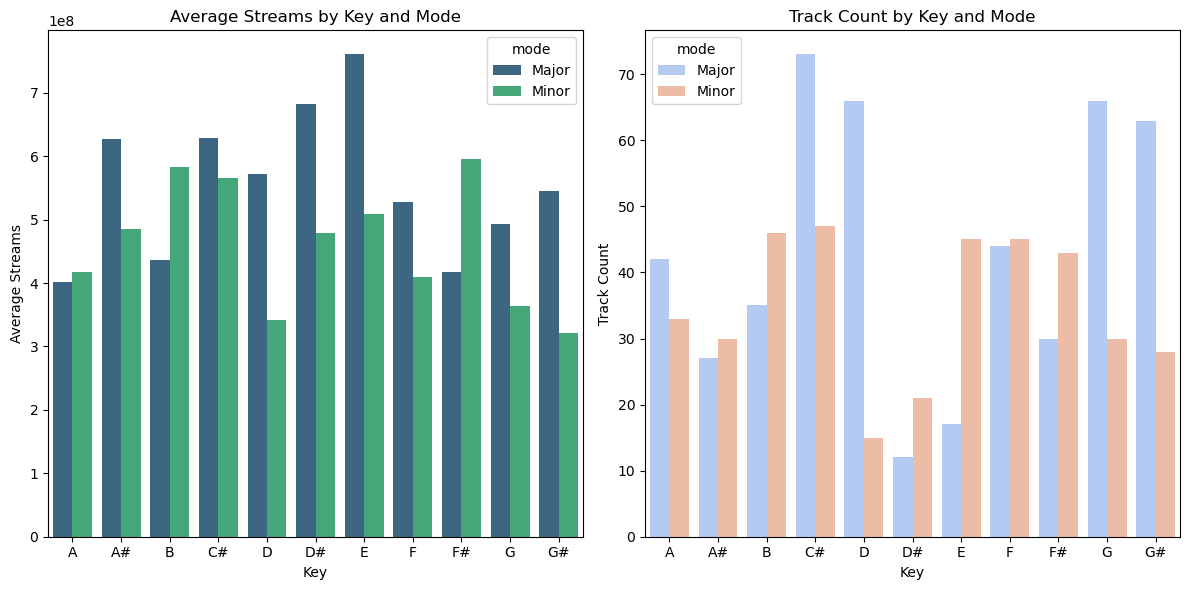

In [365]:
# Advanced Analysis: Patterns by Key and Mode, Artist and Genre Consistency in Playlists

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'key' and 'mode' (Major vs Minor), and calculate both the average streams and the count of tracks for each group
key_mode_streams = Spotify_Data.groupby(['key', 'mode']).agg(
    streams=('streams', 'mean'), 
    track_count=('streams', 'size')
).reset_index()

# Display the patterns
print("Patterns based on key and mode:")
print(key_mode_streams, "\n")

# Create a bar plot to visualize the patterns
plt.figure(figsize=(12, 6))

# Plot Average Streams
plt.subplot(1, 2, 1)
sns.barplot(x='key', y='streams', hue='mode', data=key_mode_streams, palette='viridis')
plt.title('Average Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Average Streams')

# Plot Track Count with a different color palette
plt.subplot(1, 2, 2)
sns.barplot(x='key', y='track_count', hue='mode', data=key_mode_streams, palette='coolwarm')
plt.title('Track Count by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Track Count')

plt.tight_layout()
plt.show()

### Advanced Analysis: Patterns by Key and Mode in Playlists

- **Problem:** Analyze how the average number of streams differs across musical keys in the dataset. We aim to identify any patterns or trends in terms of how certain keys may influence the popularity (streams) of tracks.
- **Approach:** 
  - The dataset is grouped by the 'key' column to calculate the average streams for each key.
  - The keys are then converted to strings for better readability when plotting.
  - A bar plot is created using the `seaborn` library to visualize the average streams for each key, with the colors of the bars representing different keys. The `viridis` color palette is used to differentiate the keys in the plot.
  - The plot includes the 'key' on the x-axis and 'average streams' on the y-axis, with the hue parameter applied to show the different keys with distinct colors.
  - The legend is hidden since the hue is just for color differentiation and not necessary for understanding the chart.
- **Functions to be Used:**
  - `groupby()` – groups the data by 'key' to calculate the average streams for each musical key.
  - `reset_index()` – resets the index of the grouped data to make it suitable for plotting.
  - `astype(str)` – converts keys to string format for better display in the plot.
  - `sns.barplot()` – generates a bar plot to show average streams by key, with hue for coloring the bars.
  - `plt.legend()` – hides the legend in the plot as the hue only provides color without additional context.
- **Expected Output:**
  - A bar plot displaying the average number of streams for each musical key.
  - The bars will be color-coded based on the key, and the color palette used will be 'viridis'.
  - The plot will provide insight into which musical keys tend to have higher or lower average streams.

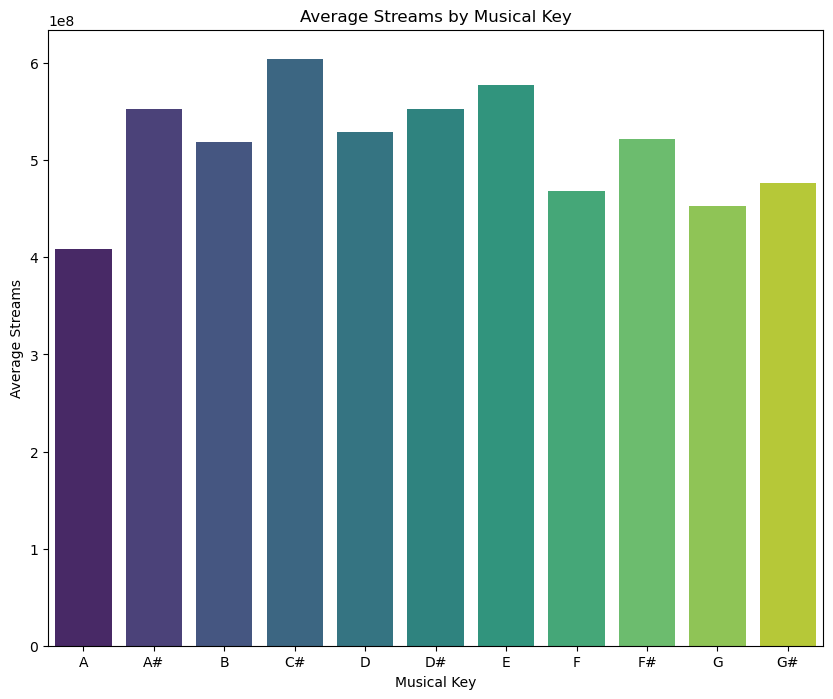

In [373]:
# Advanced Analysis: Patterns by Key and Mode, Artist and Genre Consistency in Playlists

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Patterns by Key with Multiple Colors
# Group data by 'key' and calculate the average streams
avg_streams_by_key = Spotify_Data.groupby('key')['streams'].mean()

# Prepare data for plotting with hue applied to 'key'
plot_data = avg_streams_by_key.reset_index()
plot_data['key'] = plot_data['key'].astype(str)  # Convert keys to strings for display

# Plotting with palette colors using hue
plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, x='key', y='streams', palette='viridis', hue='key', dodge=False)
plt.xlabel('Musical Key')
plt.ylabel('Average Streams')
plt.title('Average Streams by Musical Key')
plt.legend([], [], frameon=False)  # Hides the legend since 'hue' is just for color
plt.show()

### Advanced Analysis: Patterns by Mode (Major vs. Minor) in Playlists

- **Problem:** Analyze how the average number of streams differs between tracks with different modes (Major vs. Minor). We want to see if there is any trend indicating that one mode might have higher or lower popularity in terms of streams.
- **Approach:**
  - The dataset is grouped by the 'mode' column, where `0` represents Minor and `1` represents Major, to calculate the average streams for each mode.
  - A bar plot is created using the `seaborn` library to visualize the average streams for each mode, with color applied using the `coolwarm` color palette to distinguish between Major and Minor.
  - The x-axis displays the mode (Minor or Major), and the y-axis shows the average streams.
  - The legend is hidden since the hue only adds color and doesn't provide additional meaningful information.
- **Functions to be Used:**
  - `groupby()` – groups the data by 'mode' to calculate the average streams for each mode.
  - `reset_index()` – resets the index of the grouped data for easier plotting.
  - `sns.barplot()` – creates a bar plot to visualize the average streams by mode, applying hue for color differentiation.
  - `plt.xticks()` – customizes the x-axis ticks to display 'Minor' and 'Major' instead of numeric values (0 and 1).
  - `plt.legend()` – hides the legend as it’s not necessary for this specific plot.
- **Expected Output:**
  - A bar plot comparing the average number of streams between Minor and Major modes.
  - The bars will be color-coded based on the mode using the 'coolwarm' color palette.
  - The plot will allow easy comparison between the popularity of Minor and Major modes in terms of streams.

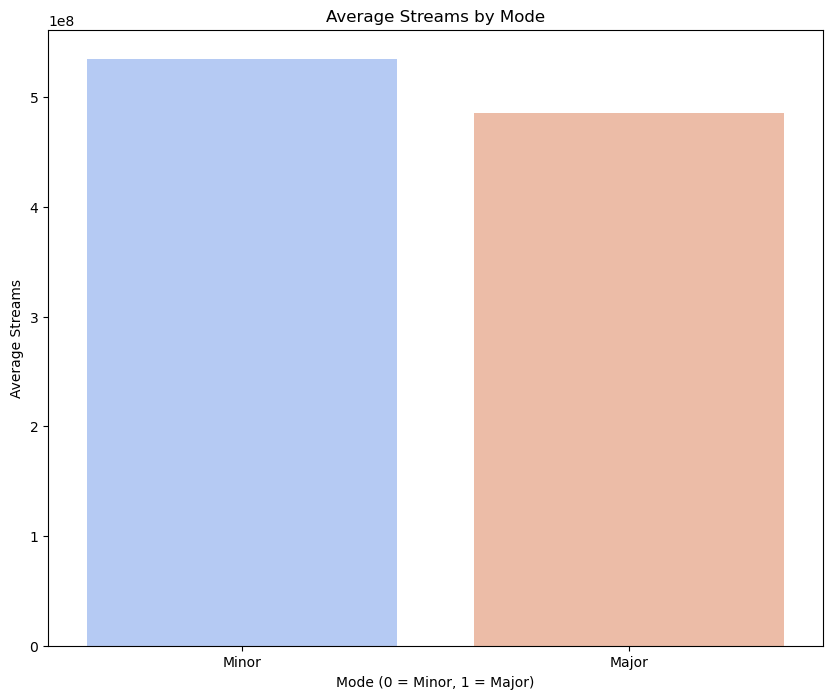

In [371]:
# Patterns by Mode (Major vs. Minor)
# Group data by 'mode' and calculate the average streams
avg_streams_by_mode = Spotify_Data.groupby('mode')['streams'].mean().reset_index()

# Plotting with the updated method to avoid the FutureWarning
plt.figure(figsize=(10, 8))
sns.barplot(data=avg_streams_by_mode, x='mode', y='streams', palette='coolwarm', hue='mode', dodge=False)
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Average Streams')
plt.title('Average Streams by Mode')
plt.xticks([0, 1], ['Minor', 'Major'])
plt.legend([], [], frameon=False)  # Hide legend since hue is only for color
plt.show()

### Advanced Analysis: Most Frequently Appearing Artists in Playlists and Charts Across Multiple Platforms

- **Problem:** Identify the top 10 artists who appear most frequently in playlists and charts across multiple platforms (Spotify Playlists, Deezer Playlists, Apple Playlists, Spotify Charts, Apple Charts, Deezer Charts, and Shazam Charts). Visualize and compare the total number of appearances of these artists across all platforms.
- **Approach:** The data is grouped by artist and platform, and the total number of appearances is calculated. The artists are then sorted by their total appearances across all platforms in descending order. A bar chart is used to visualize the top 10 artists, with each platform's appearances displayed as separate bars. Missing values (for artists not appearing on certain platforms) are handled with a count of zero.
- **Functions to be Used:**
  - `groupby()` – groups the data by artist name and platform to sum the appearances.
  - `melt()` – reshapes the data into a long format, making it suitable for plotting comparisons.
  - `transform('sum')` – calculates the total appearances across all platforms for each artist.
  - `sort_values()` – sorts the artists by total appearances in descending order.
  - `drop_duplicates()` – ensures that only unique artists are displayed in the final chart.
  - `sns.barplot()` – creates a bar chart to visualize the total appearances of each artist across the different platforms.
  - `plt.legend()` – adds a legend to distinguish between platforms.
  - `plt.xticks()` – rotates the x-axis labels for readability.
- **Expected Output:** 
  - A bar chart displaying the top 10 artists with the most total appearances in playlists and charts, across multiple platforms.
  - A printout of the detailed appearance counts of the top artists in each platform.

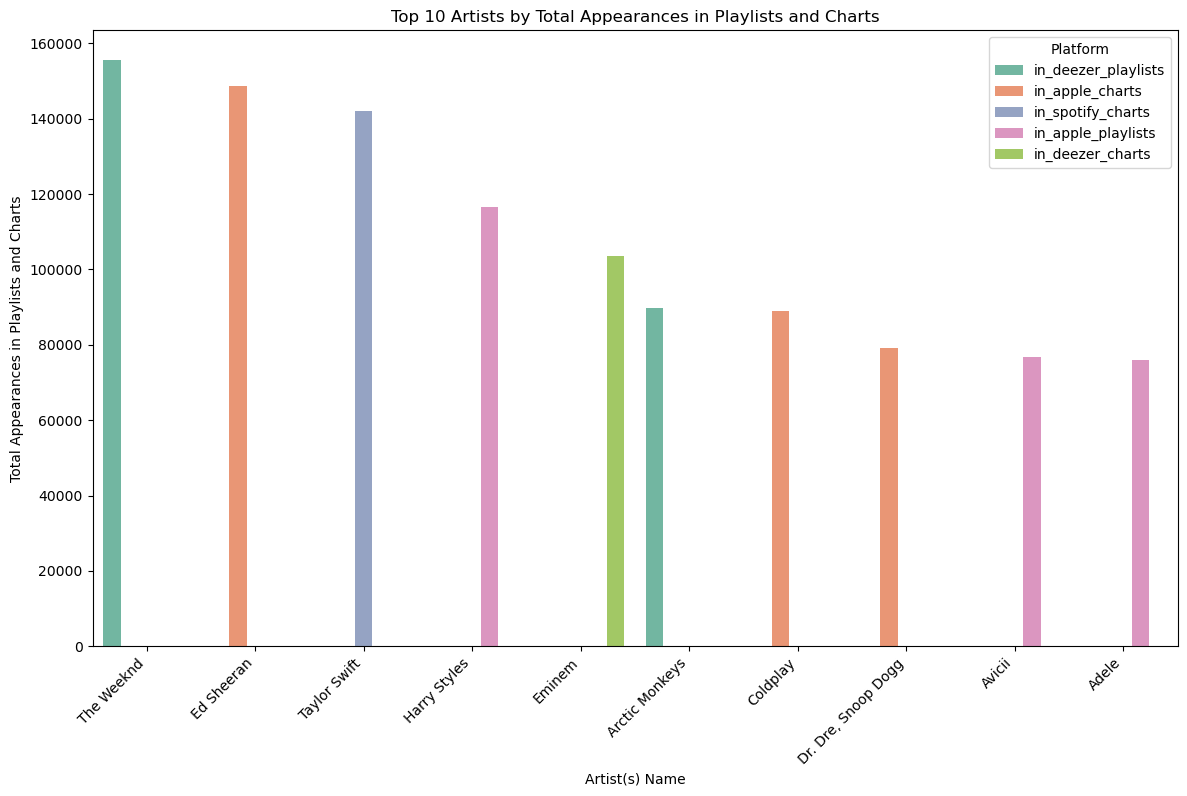

Detailed artist appearances in playlists and charts:
           artist(s)_name             platform   count  total_appearances
1217           The Weeknd  in_deezer_playlists  7551.0           155686.0
2739           Ed Sheeran      in_apple_charts   488.0           148657.0
2493         Taylor Swift    in_spotify_charts   542.0           142133.0
1513         Harry Styles   in_apple_playlists  1741.0           116550.0
3396               Eminem     in_deezer_charts    12.0           103644.0
670        Arctic Monkeys  in_deezer_playlists  4992.0            89886.0
2691             Coldplay      in_apple_charts    25.0            88931.0
2721  Dr. Dre, Snoop Dogg      in_apple_charts   118.0            79126.0
1323               Avicii   in_apple_playlists   407.0            76640.0
1297                Adele   in_apple_playlists   646.0            76029.0


In [359]:
# Patterns by Artist Appearance in Playlists and Charts
# Summarize the count of appearances for each artist in playlists and charts across all platforms
artist_playlist_counts = Spotify_Data.groupby('artist(s)_name')[[
    'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 
    'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'
]].sum().reset_index()

# Melt the DataFrame to have a long format for easier plotting
artist_playlist_counts = artist_playlist_counts.melt(
    id_vars='artist(s)_name', var_name='platform', value_name='count'
)

# Sorting artists by total appearances across all platforms
artist_playlist_counts['total_appearances'] = artist_playlist_counts.groupby('artist(s)_name')['count'].transform('sum')

# Sorting by total appearances in descending order and getting the top 10 artists
top_artists = artist_playlist_counts.sort_values(by='total_appearances', ascending=False).drop_duplicates('artist(s)_name').head(10)

# Plotting the top artists
plt.figure(figsize=(14, 8))
sns.barplot(data=top_artists, x='artist(s)_name', y='total_appearances', hue='platform', dodge=True, palette='Set2')
plt.xlabel('Artist(s) Name')
plt.ylabel('Total Appearances in Playlists and Charts')
plt.title('Top 10 Artists by Total Appearances in Playlists and Charts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.show()

# Display the detailed appearance counts of the top artists
print("Detailed artist appearances in playlists and charts:")
print(top_artists)